In [5]:
# Load Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
df = pd.read_csv('consumer_complaints_sentiments.csv')

In [6]:
# Put in fstring to show # of cols
num_columns = df.shape[1]
num_rows = df.shape[0]
print(f"There are {num_columns} columns in this dataset.")
print(f"There are {num_rows} rows in this dataset.")
print('\nColumns:')
for col in df.columns:
    print(f"*{col}")
# print(list(df.columns))

There are 18 columns in this dataset.
There are 15540 rows in this dataset.

Columns:
*date_received
*product
*sub_product
*issue
*sub_issue
*consumer_complaint_narrative
*company_public_response
*company
*state
*zipcode
*tags
*consumer_consent_provided
*submitted_via
*date_sent_to_company
*company_response_to_consumer
*timely_response
*consumer_disputed?
*complaint_id


In [7]:
# Total nulls
total_null = df.isnull().sum().sum()
print(f'{total_null} Total blank values in this dataset.')
# Percentage of null data
print("Percentage of entries that were left blank.")
df.isnull().sum()/len(df)

73302 Total blank values in this dataset.
Percentage of entries that were left blank.


date_received                   0.000000
product                         0.000000
sub_product                     0.249871
issue                           0.000000
sub_issue                       0.602124
consumer_complaint_narrative    1.000000
company_public_response         1.000000
company                         0.000000
state                           0.003089
zipcode                         0.003024
tags                            0.858880
consumer_consent_provided       1.000000
submitted_via                   0.000000
date_sent_to_company            0.000000
company_response_to_consumer    0.000000
timely_response                 0.000000
consumer_disputed?              0.000000
complaint_id                    0.000000
dtype: float64

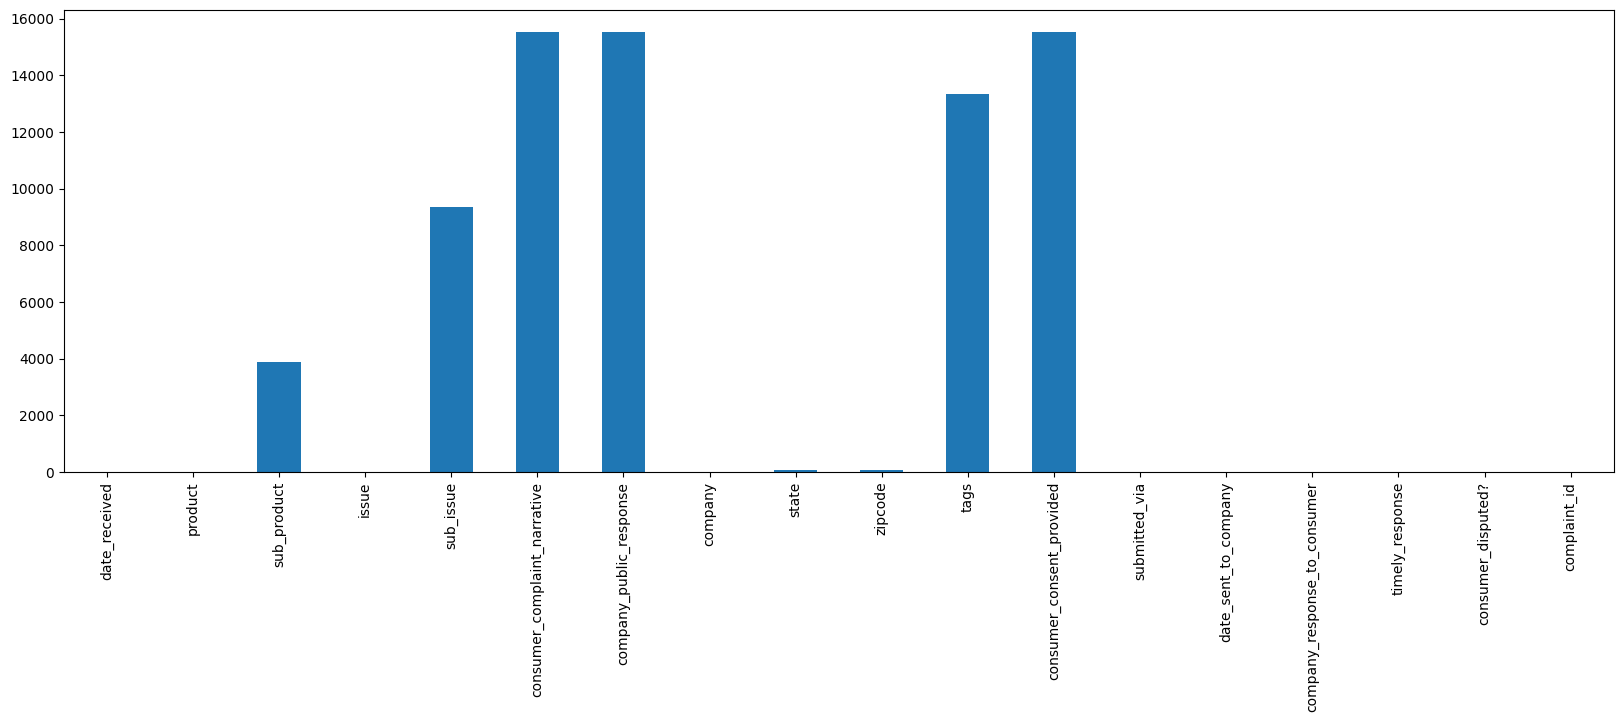

In [8]:
plt.figure(figsize=(20,6))
df.isnull().sum().plot(kind='bar')
plt.show()

In [9]:
# Null Values by Column
df.isnull().sum()
print('Columns with more than 70% null values.')
print('These will not be considered for results')
unconsidered = df.columns[df.isnull().sum()/len(df) >= .7]
df.drop(unconsidered, axis=1, inplace=True)
print(list(unconsidered))
print("Complaint ID was also excluded as it is only used for indexing.")
df.drop('complaint_id', axis=1, inplace=True)

Columns with more than 70% null values.
These will not be considered for results
['consumer_complaint_narrative', 'company_public_response', 'tags', 'consumer_consent_provided']
Complaint ID was also excluded as it is only used for indexing.


In [10]:
print(f'{df.shape[1]} columns will be considered in the dataset analysis.')

13 columns will be considered in the dataset analysis.


In [11]:
from datetime import datetime
# print(f"There are {len(df['product'].value_counts())} different Products.")
last=datetime.strptime(df['date_received'].min(), '%m/%d/%Y').date()
first=datetime.strptime(df['date_received'].max(), '%m/%d/%Y').date()
delta = last-first
print(f"Reports were received over a {delta.days} day period.",
f"\nStarting on {df['date_received'].max()} and ending on {df['date_received'].min()}.")

Reports were received over a 129 day period. 
Starting on 9/4/2013 and ending on 1/11/2014.


There are 9 different Products.


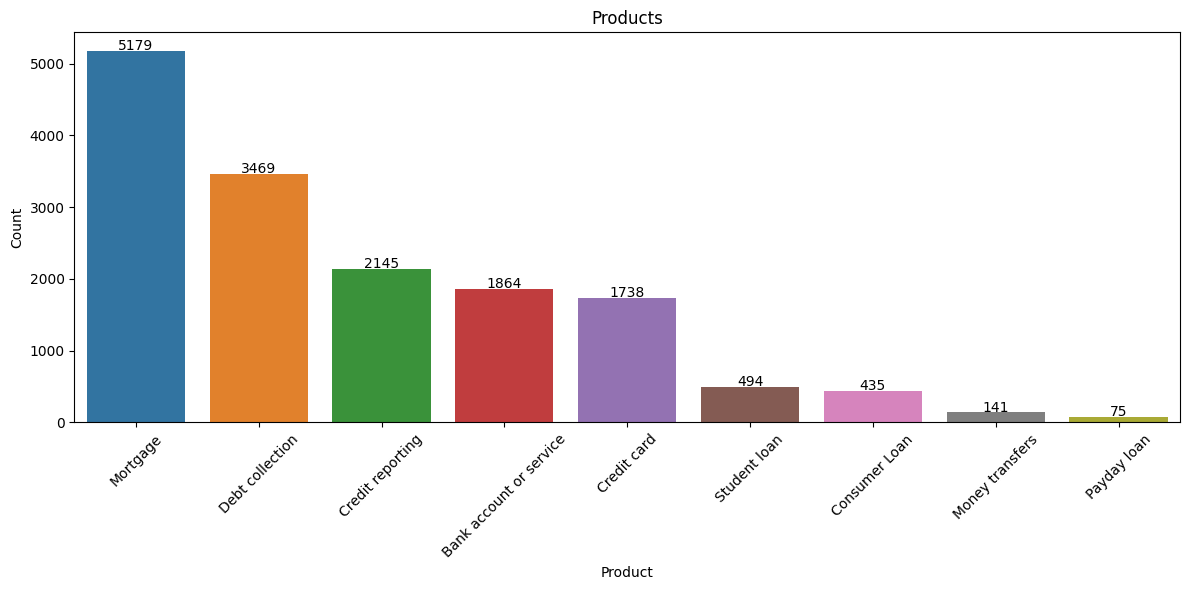

In [12]:
# Bar chart showing claims by product
plt.rcParams['figure.figsize']=[30,20]
plt.rcParams['figure.autolayout']=True
print(f"There are {len(df['product'].unique())} different Products.")
plt.figure(figsize=(12,6))
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df['product'].value_counts()))]
ax2=sns.countplot(x=df['product'],order=df['product'].value_counts().index)
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center') 
# df['product'].value_counts().plot(kind="bar", color=my_colors).set_facecolor('grey')
plt.title('Products')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Product')
plt.show()

In [13]:
too_many = {}
for col in df.columns:
    if len(df[col].value_counts()) > 25:
        if col.startswith('date'):
            pass
        else:
            too_many[col] = len(df[col].value_counts())

too_many
too_many_cols = list(too_many.keys())
counts = [float(too_many[k]) for k in too_many_cols]


In [14]:
print(f"There are {len(df['sub_product'].value_counts())} different Sub-Products,")
print(f"{len(df['issue'].value_counts())} different Issues,")
print(f"{len(df['sub_issue'].value_counts())} different Sub-Issues,")
print(f"And {len(df['company'].value_counts())} different Companies.")
print(f"Across {len(df['state'].value_counts())} different States.")
print(f"And {len(df['zipcode'].value_counts())} different Zipcodes.")


There are 28 different Sub-Products,
74 different Issues,
65 different Sub-Issues,
And 883 different Companies.
Across 59 different States.
And 7402 different Zipcodes.


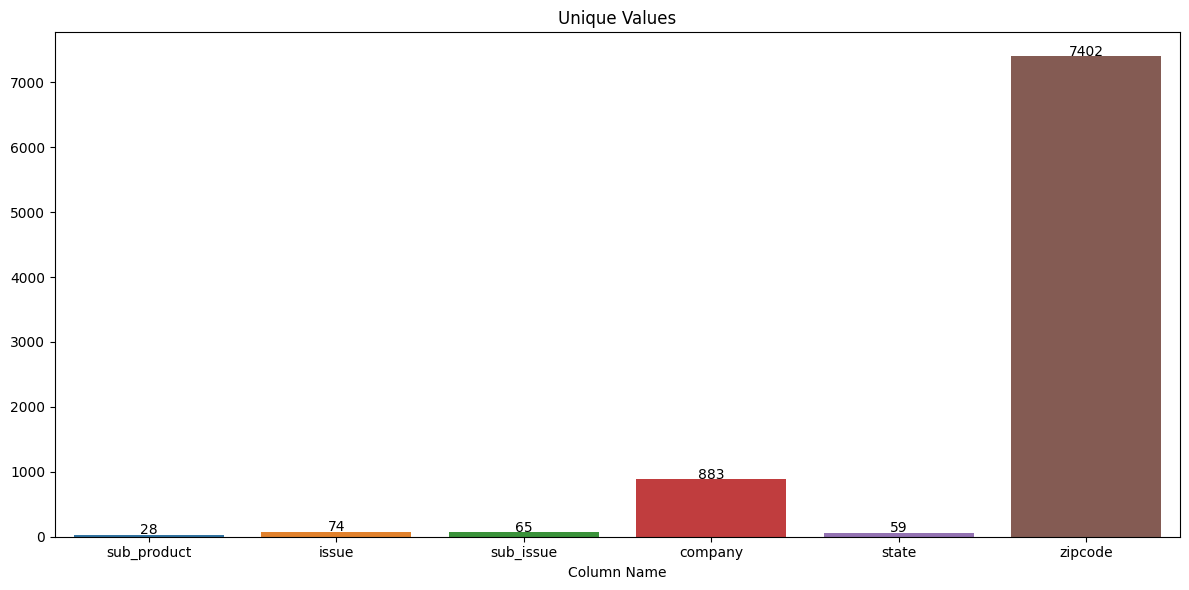

In [15]:
plt.figure(figsize=(12,6))
ax2=sns.barplot(x=too_many_cols, y=counts)
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center') 

plt.title('Unique Values')
plt.xlabel('Column Name')
plt.show()

Consumers submitted complaints using 6 different methods.


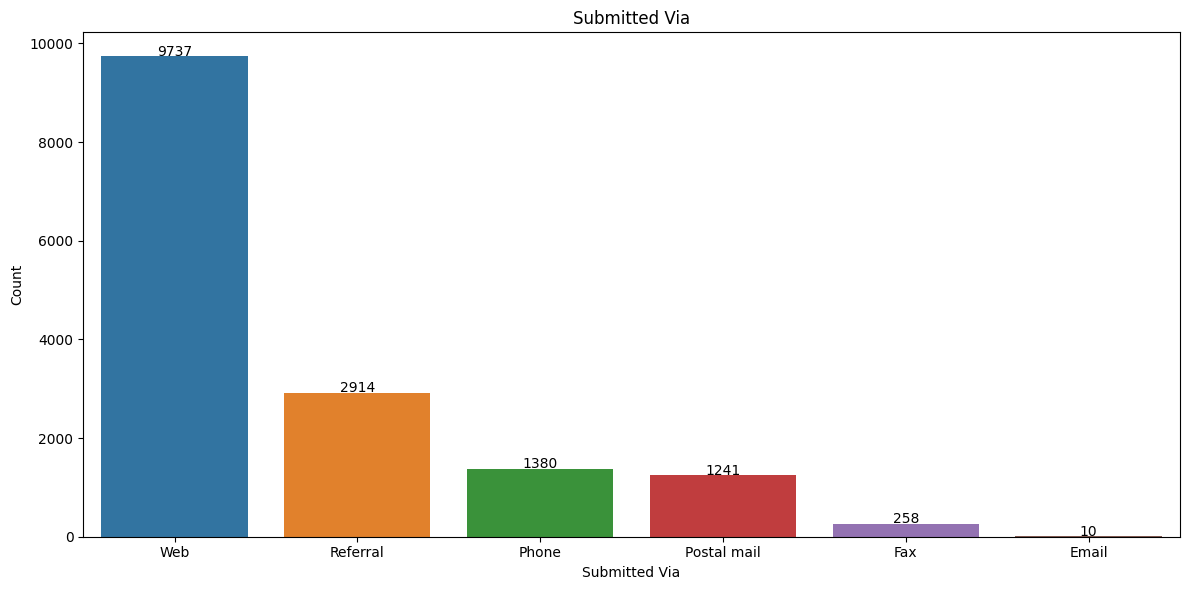

In [16]:
# Bar chart showing claims by product
print(f"Consumers submitted complaints using {len(df['submitted_via'].unique())} different methods.")
plt.figure(figsize=(12,6))
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df['submitted_via'].value_counts()))]
ax2=sns.countplot(x=df['submitted_via'],order=df['submitted_via'].value_counts().index)
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center') 
# df['submitted_via'].value_counts().plot(kind="bar", color=my_colors).set_facecolor('grey')
plt.title('Submitted Via')
# plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Submitted Via')
plt.show()

Companies responded in 5 different ways.


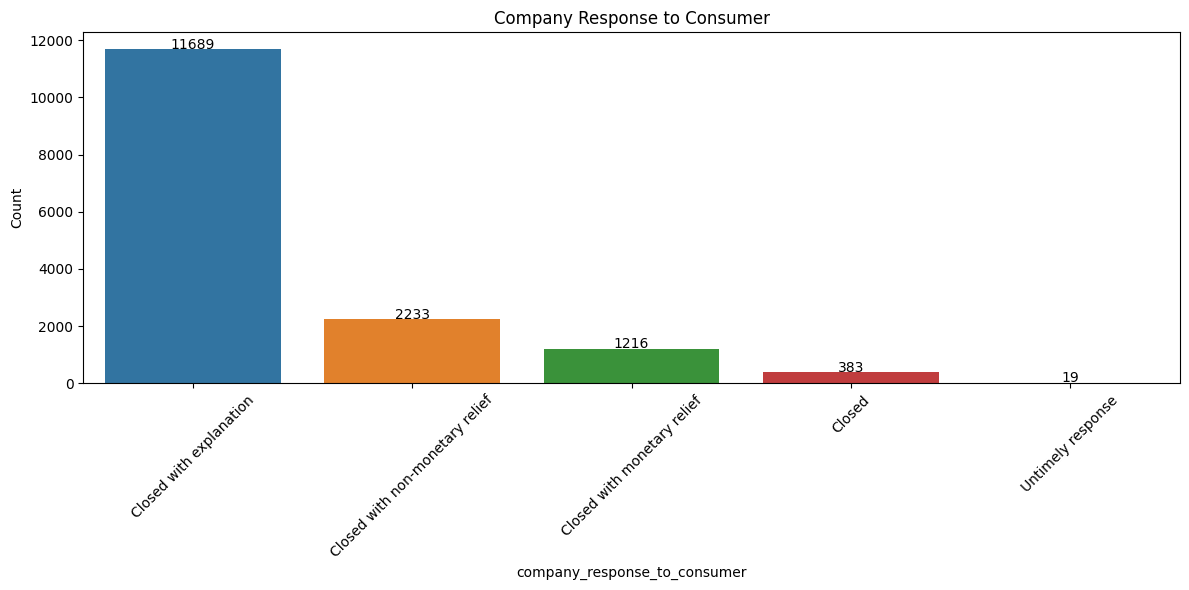

In [17]:
print(f"Companies responded in {len(df['company_response_to_consumer'].unique())} different ways.")
plt.figure(figsize=(12,6))
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df['company_response_to_consumer'].value_counts()))]
ax2=sns.countplot(x=df['company_response_to_consumer'],order=df['company_response_to_consumer'].value_counts().index)
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center') 
# df['company_response_to_consumer'].value_counts().plot(kind="bar", color=my_colors).set_facecolor('grey')
plt.title('Company Response to Consumer')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

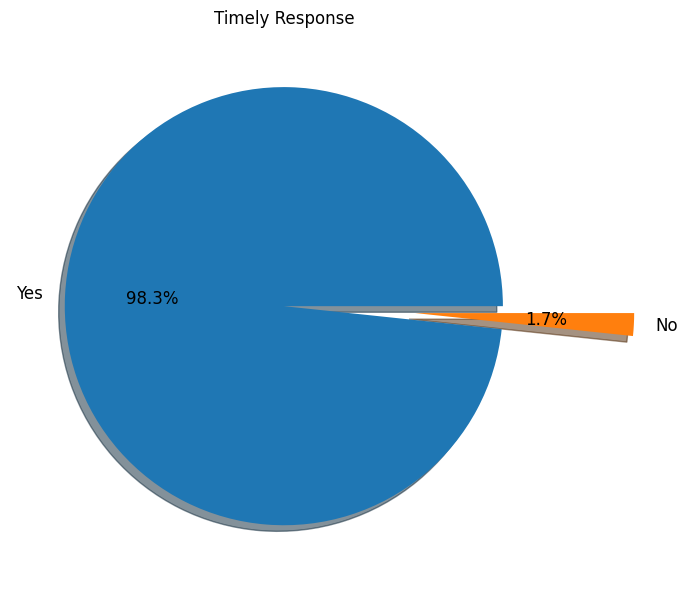

In [18]:
plt.figure(figsize=(12,6))
df['timely_response'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0, 0.6), title='Timely Response', label='', fontsize=12)
plt.show()

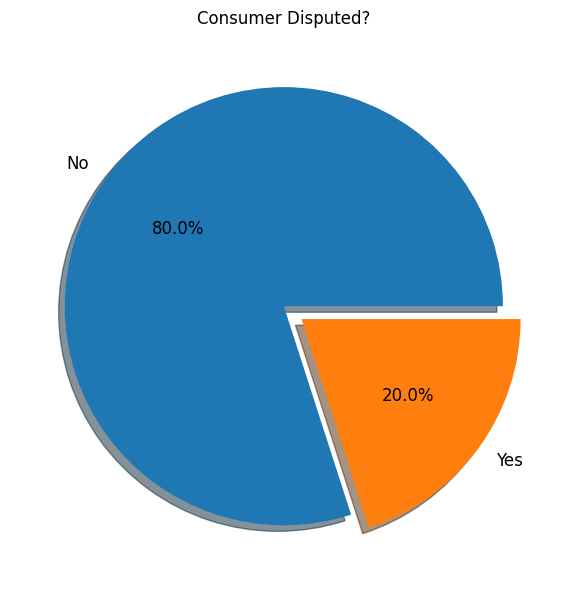

In [19]:
plt.figure(figsize=(12,6))
df['consumer_disputed?'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0, 0.1), title='Consumer Disputed?', label='', fontsize=12)
plt.show()

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
stop_words=set(stopwords.words('english'))
def remove_stops_punct_nums(words):
    words = ' '.join(words.split(',')).split()
    new_words = []
    for word in words:
        if word == 'dtype':
            continue
        if word.isalpha():
            if word not in stop_words:
                new_words.append(word)
        else:
            new_word = ""
            for c in word:
                if c.isalpha():
                    new_word = new_word + c
            if new_word == '' or new_word == 'd' or new_word == 's':
                continue
            new_words.append(new_word)
    return ' '.join(new_words)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/mcfralish/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
df['sub_issue'].replace(np.nan, '', inplace=True)
df['issue'] = df['issue'].apply(lambda x: remove_stops_punct_nums(x))
df['sub_issue'] = df['sub_issue'].apply(lambda x: remove_stops_punct_nums(x))

In [ ]:
df[['issue', 'sub_issue']]

,issue,sub_issue
0,Loan modification collection foreclosure,
1,Loan servicing payments escrow account,
2,Incorrect information credit report,Account status
3,Repaying loan,Repaying loan
4,False statements representation,Attempted collect wrong amount
...,...,...
15535,Loan servicing payments escrow account,
15536,Incorrect information credit report,Account status
15537,Incorrect information credit report,Account status
15538,Deposits withdrawals,


In [ ]:
# Function to classify Records by sentiment. Threshold set to .25
from nltk.sentiment import SentimentIntensityAnalyzer
def classify(x, threshold = .25):
    sia = SentimentIntensityAnalyzer()
    score=sia.polarity_scores(x)['compound']
    if score <= -threshold:
        return "Negative"
    elif score >= threshold:
        return "Positive"
    else:
        return "Neutral"


In [ ]:
df['total_issue'] = df['issue'] + ' ' + df['sub_issue']
df['issue_sentiment'] = df['total_issue'].apply(lambda x: classify(x))

In [ ]:
df['issue'] = df['total_issue']
df.drop(['total_issue', 'sub_issue'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'company', 'state',
       'zipcode', 'submitted_via', 'date_sent_to_company',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed?',
       'issue_sentiment'],
      dtype='object')

In [ ]:
df[['issue', 'issue_sentiment']].head(50)

,issue,issue_sentiment
0,Loan modification collection foreclosure,Neutral
1,Loan servicing payments escrow account,Neutral
2,Incorrect information credit report Account st...,Positive
3,Repaying loan Repaying loan,Neutral
4,False statements representation Attempted coll...,Negative
5,Application processing delay,Negative
6,Credit line increasedecrease,Positive
7,Deposits withdrawals,Neutral
8,Deposits withdrawals,Neutral
9,Loan modification collection foreclosure,Neutral


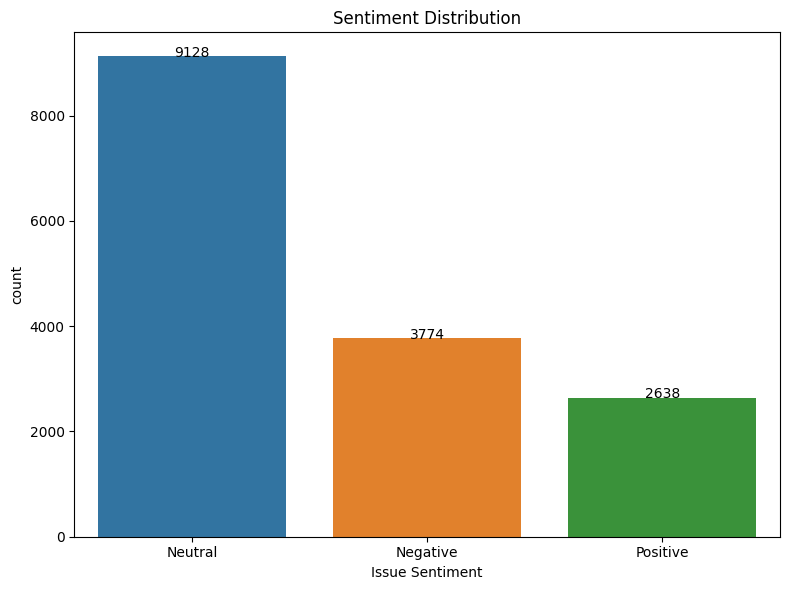

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=[8,6]
plt.rcParams['figure.autolayout']=True
# ax2 = sns.countplot(x=df['issue_sentiment'])
ax2=sns.countplot(x=df['issue_sentiment'],order=df['issue_sentiment'].value_counts().index)
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height-10.2, s = '{:.0f}'.format(height),ha = 'center') 
plt.title('Sentiment Distribution')
plt.xlabel('Issue Sentiment')
plt.show()

In [ ]:
# Top 10 most frequent words
# Plot them (Frequency Plot)
# 1 for all, 1 for each type
# Top 10 Frequent pos words - neutral words - negative words

# Top 10 Frequency and top 20 Frequency words

In [ ]:
neg = df[df['issue_sentiment']=='Negative']
neut = df[df['issue_sentiment']=='Neutral']
pos = df[df['issue_sentiment']=='Positive']

In [ ]:
from nltk.probability import FreqDist as fd

all_str = ' '.join(df['issue'].tolist())
pos_str = ' '.join(pos['issue'].tolist())
neut_str = ' '.join(neut['issue'].tolist())
neg_str = ' '.join(neg['issue'].tolist())
all_words = word_tokenize(all_str)
pos_words = word_tokenize(pos_str)
neut_words = word_tokenize(neut_str)
neg_words = word_tokenize(neg_str)

In [ ]:
all_freq = fd(all_words)
neut_freq = fd(neut_words)
pos_freq = fd(pos_words)
neg_freq = fd(neg_words)

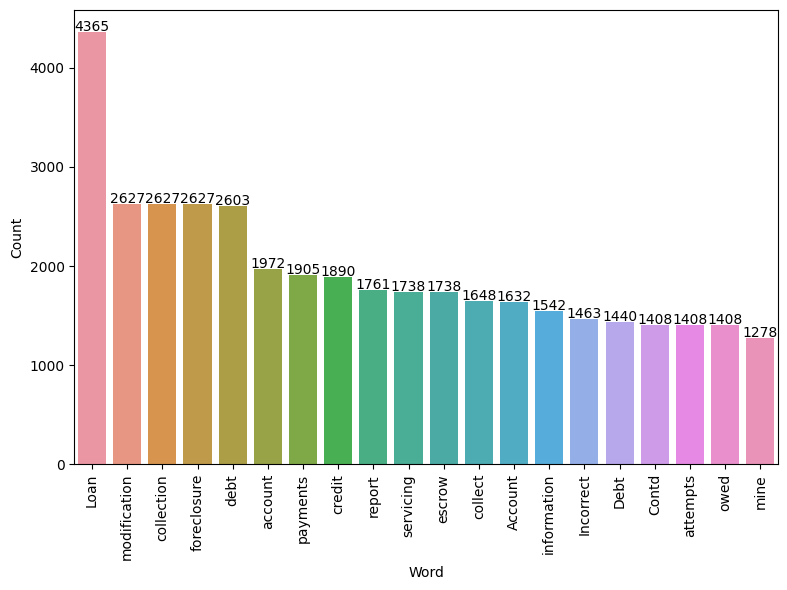

In [ ]:
from collections import Counter
all_counter_df = pd.DataFrame(Counter(all_words).most_common(20), columns=['Word', 'Count']) 
# all_counter_df.plot.bar(x='Word',y='Count', legend=False, title='Most Common Words in Dataset')
ax2=sns.barplot(x=all_counter_df['Word'],y= all_counter_df['Count'])
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center') 
plt.xticks(rotation=90)
plt.show()

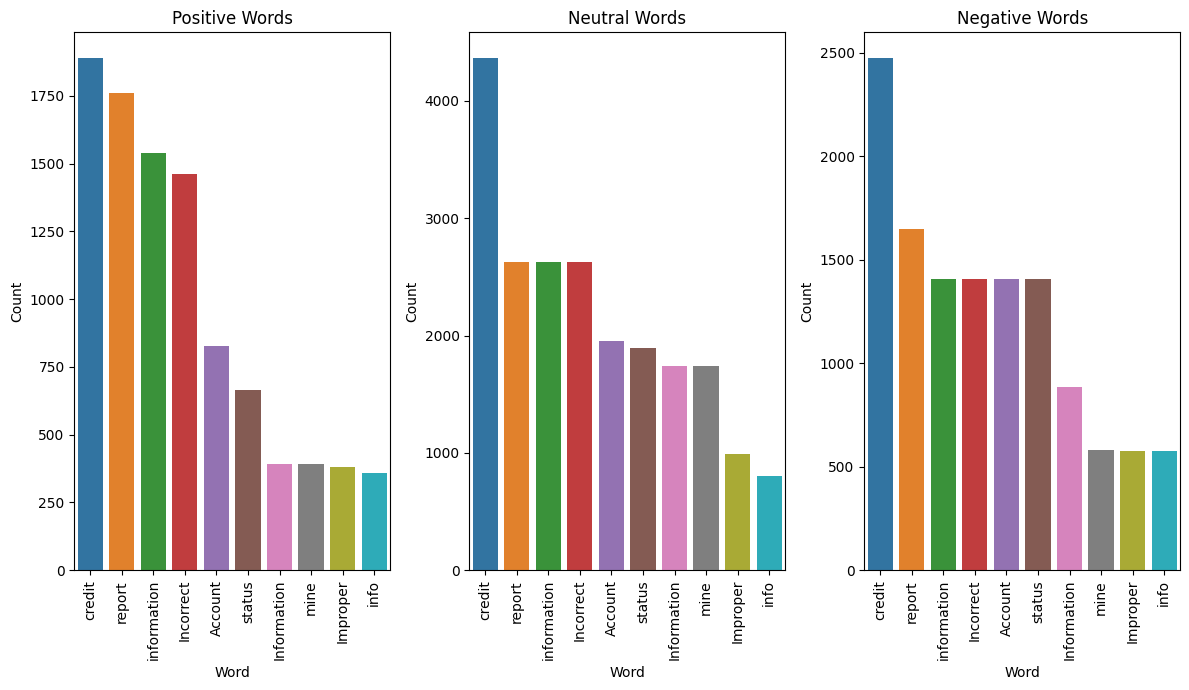

In [ ]:
pos_counter_df = pd.DataFrame(Counter(pos_words).most_common(10), columns=['Word', 'Count'])
neut_counter_df = pd.DataFrame(Counter(neut_words).most_common(10), columns=['Word', 'Count']) 
neg_counter_df = pd.DataFrame(Counter(neg_words).most_common(10), columns=['Word', 'Count']) 
plt.rcParams['figure.figsize']=[12,7]
plt.rcParams['figure.autolayout']=True


fig, axs = plt.subplots(nrows=1, ncols=3)
# pos_counter_df.plot(ax=axs[0], kind='bar', x="Word", legend=False)
sns.barplot(ax=axs[0], x=pos_counter_df['Word'], y=pos_counter_df['Count'])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for p in axs[0].patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height+10.2, s = '{:.0f}'.format(height),ha = 'center')
axs[0].set_title("Positive Words")

sns.barplot(ax=axs[1], x=neut_counter_df['Word'], y=neut_counter_df['Count'])
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
# neut_counter_df.plot(ax=axs[1], kind='bar', x="Word", legend=False)
axs[1].set_title("Neutral Words")

sns.barplot(ax=axs[2], x=neg_counter_df['Word'], y=neg_counter_df['Count'])
axs[2].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
# neg_counter_df.plot(ax=axs[2], kind='bar', x="Word", legend=False)
axs[2].set_title("Negative Words")
plt.show()


                TF-IDF
foreclosure   0.527869
modification  0.527869
collection    0.527869
loan          0.405045
problem       0.000000


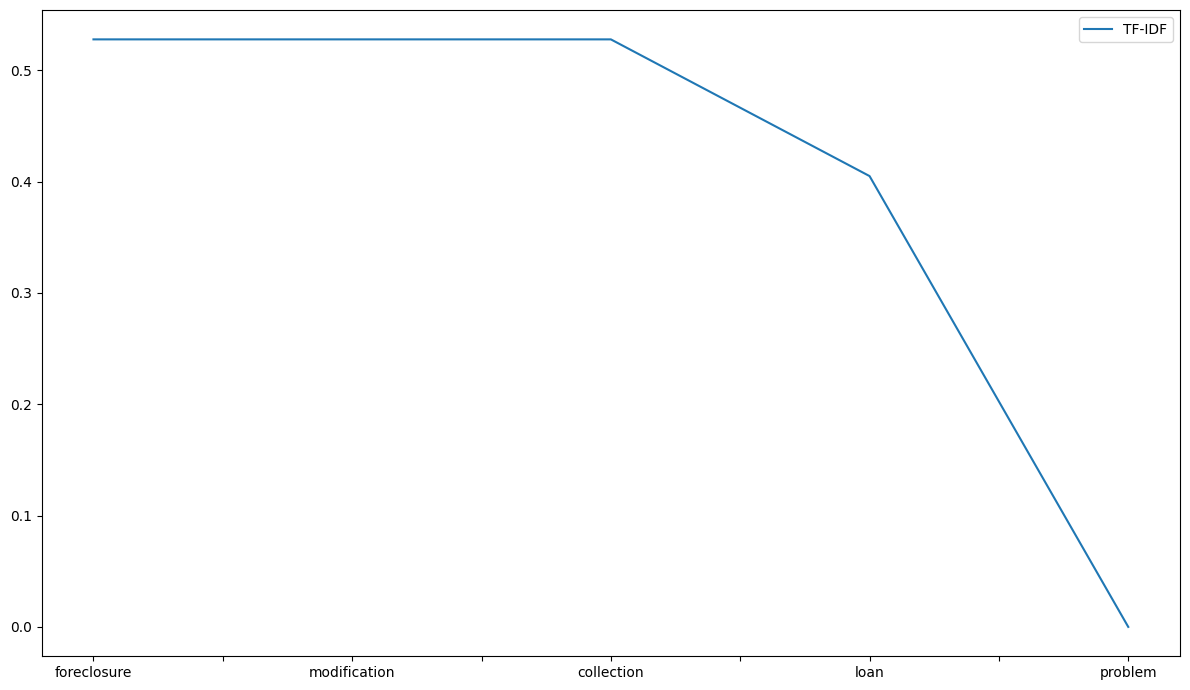

In [ ]:
# Term Frequency/Inverse Document Frequency
# Looking for 90%+
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
tfIdf = vectorizer.fit_transform(df['issue'])
tfIdf_df = pd.DataFrame(tfIdf[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=['TF-IDF'])
tfIdf_df =tfIdf_df.sort_values('TF-IDF', ascending=False)
print(tfIdf_df.head())
# tfIdf_df.head().plot()
tfIdf_df.nlargest(5, 'TF-IDF').plot()
plt.show()

In [ ]:
idf = vectorizer.idf_
d = dict(zip(vectorizer.get_feature_names_out(), idf))
names = list(d.keys())
vals = list(d.values())
# plt.bar(range(len(d)), vals, tick_label=names)
# plt.show()
print(dict(zip(vectorizer.get_feature_names_out(), idf)))

{'account': 2.463937701760465, 'acct': 8.454012394579394, 'action': 4.779119182440196, 'advance': 8.16633032212761, 'advertising': 6.347171878711443, 'agree': 9.264942610795721, 'alerts': 7.217249767430466, 'amount': 5.239590920060572, 'ampm': 7.185501069115886, 'amt': 8.859477502687557, 'annual': 5.73858208617956, 'application': 4.622958451684914, 'applied': 8.571795430235776, 'apply': 9.552624683247503, 'apr': 5.880552347449947, 'arbitration': 8.253341699117241, 'arrestjail': 6.208585715425295, 'asked': 5.6273564510693355, 'atm': 5.906304843552362, 'attempt': 7.250039590253457, 'attempted': 5.166440038424957, 'attempts': 3.4006014600169316, 'attorney': 7.067718033459502, 'available': 7.319032461740408, 'bad': 9.264942610795721, 'balance': 7.760865214019447, 'bank': 7.87864824967583, 'bankruptcy': 6.374570852899557, 'better': 9.958089791355667, 'billing': 4.7568341376507615, 'broker': 4.642423786473017, 'called': 6.162600602183472, 'calls': 4.546443739500627, 'cancelling': 7.878648249

In [ ]:
all_top10 = all_freq.most_common(10)
pos_top10 = all_freq.most_common(10)
neut_top10 = all_freq.most_common(10)
neg_top10 = all_freq.most_common(10)

In [ ]:
all_top10

[('Loan', 4365),
 ('modification', 2627),
 ('collection', 2627),
 ('foreclosure', 2627),
 ('debt', 2603),
 ('account', 1972),
 ('payments', 1905),
 ('credit', 1890),
 ('report', 1761),
 ('servicing', 1738)]

<Figure size 1200x600 with 0 Axes>

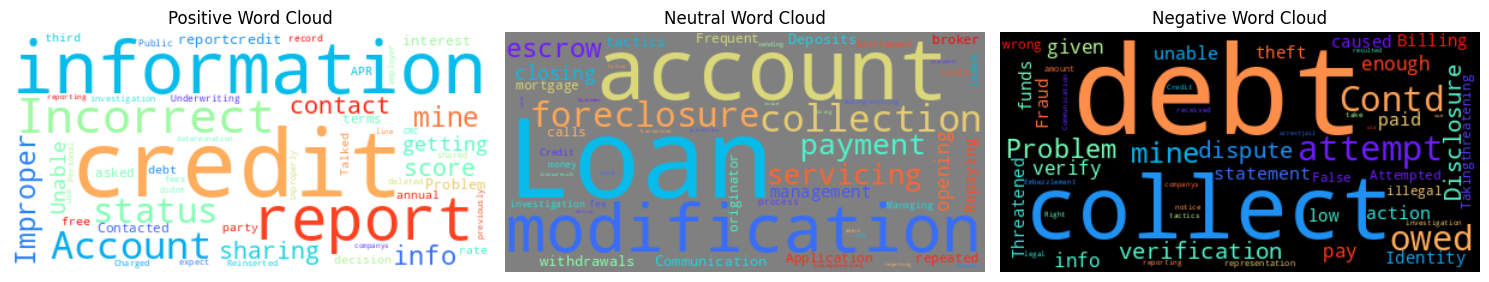

In [ ]:
# Word Cloud
from wordcloud import WordCloud,STOPWORDS
pos_wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white', max_words=50,contour_color='#023075',collocations=False,colormap='rainbow').generate(" ".join(pos_words))
neut_wordcloud = WordCloud(stopwords = STOPWORDS,background_color='grey', max_words=50,contour_color='#023075',collocations=False,colormap='rainbow').generate(" ".join(neut_words))
neg_wordcloud = WordCloud(stopwords = STOPWORDS,background_color='black', max_words=50,contour_color='#023075',collocations=False,colormap='rainbow').generate(" ".join(neg_words))

plt.rcParams["figure.figsize"] = (15,50)

plt.figure(figsize=(12,6))
fig, axs = plt.subplots(1,3)
axs[0].imshow(pos_wordcloud,interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("Positive Word Cloud")

axs[1].imshow(neut_wordcloud,interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("Neutral Word Cloud")

axs[2].imshow(neg_wordcloud,interpolation='bilinear')
axs[2].axis("off")
axs[2].set_title("Negative Word Cloud")


plt.show()


In [ ]:
df['issue_sentiment']

0         Neutral
1         Neutral
2        Positive
3         Neutral
4        Negative
           ...   
15535     Neutral
15536    Positive
15537    Positive
15538     Neutral
15539     Neutral
Name: issue_sentiment, Length: 15540, dtype: object

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay, f1_score

In [ ]:
ml_df = df[df['issue_sentiment'].isin(['Positive','Negative'])]
ml_df['issue_sentiment'] = ml_df['issue_sentiment'].map({'Positive': 1, 'Negative': 0})


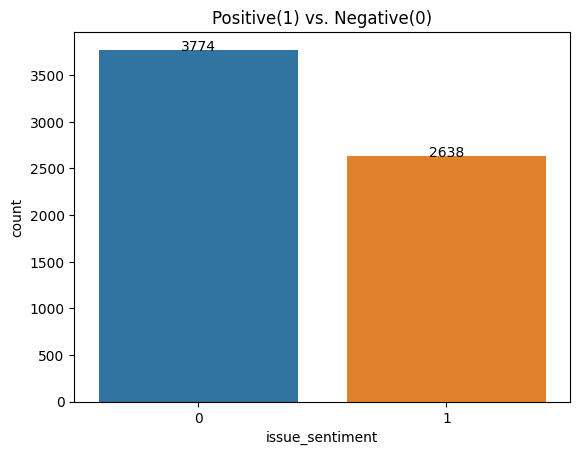

In [ ]:
# Issue Sentiment is our dependant variable
plt.rcParams.update(plt.rcParamsDefault)
ax2 = sns.countplot(x=ml_df['issue_sentiment'])
for p in ax2.patches:
    height = p.get_height() # get the height of each bar
    ax2.text(x = p.get_x()+(p.get_width()/2),y = height-10.2, s = '{:.0f}'.format(height),ha = 'center') 
plt.title('Positive(1) vs. Negative(0)')
plt.show()

In [ ]:
y = ml_df['issue_sentiment']
x = ml_df.drop(['issue_sentiment', 'issue'], axis=1)

In [ ]:
# Selecting only 6 best columns to determine results
sk = SelectKBest(score_func=chi2, k=6)
dums = [pd.get_dummies(x[col]) for col in x.columns]
x = pd.concat(dums, axis=1)
sk.fit(x,y)

SelectKBest(k=6, score_func=<function chi2 at 0x7f93a5ef5ca0>)

In [ ]:
dfscores=pd.DataFrame(sk.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=["Features","Score"]
features_rank.nlargest(6,'Score')

,Features,Score
86,Credit reporting,2071.162217
87,Debt collection,1142.115315
345,Equifax,691.764341
349,Experian,684.209919
749,"TransUnion Intermediate Holdings, Inc.",515.903543
107,"Other (i.e. phone, health club, etc.)",416.249540


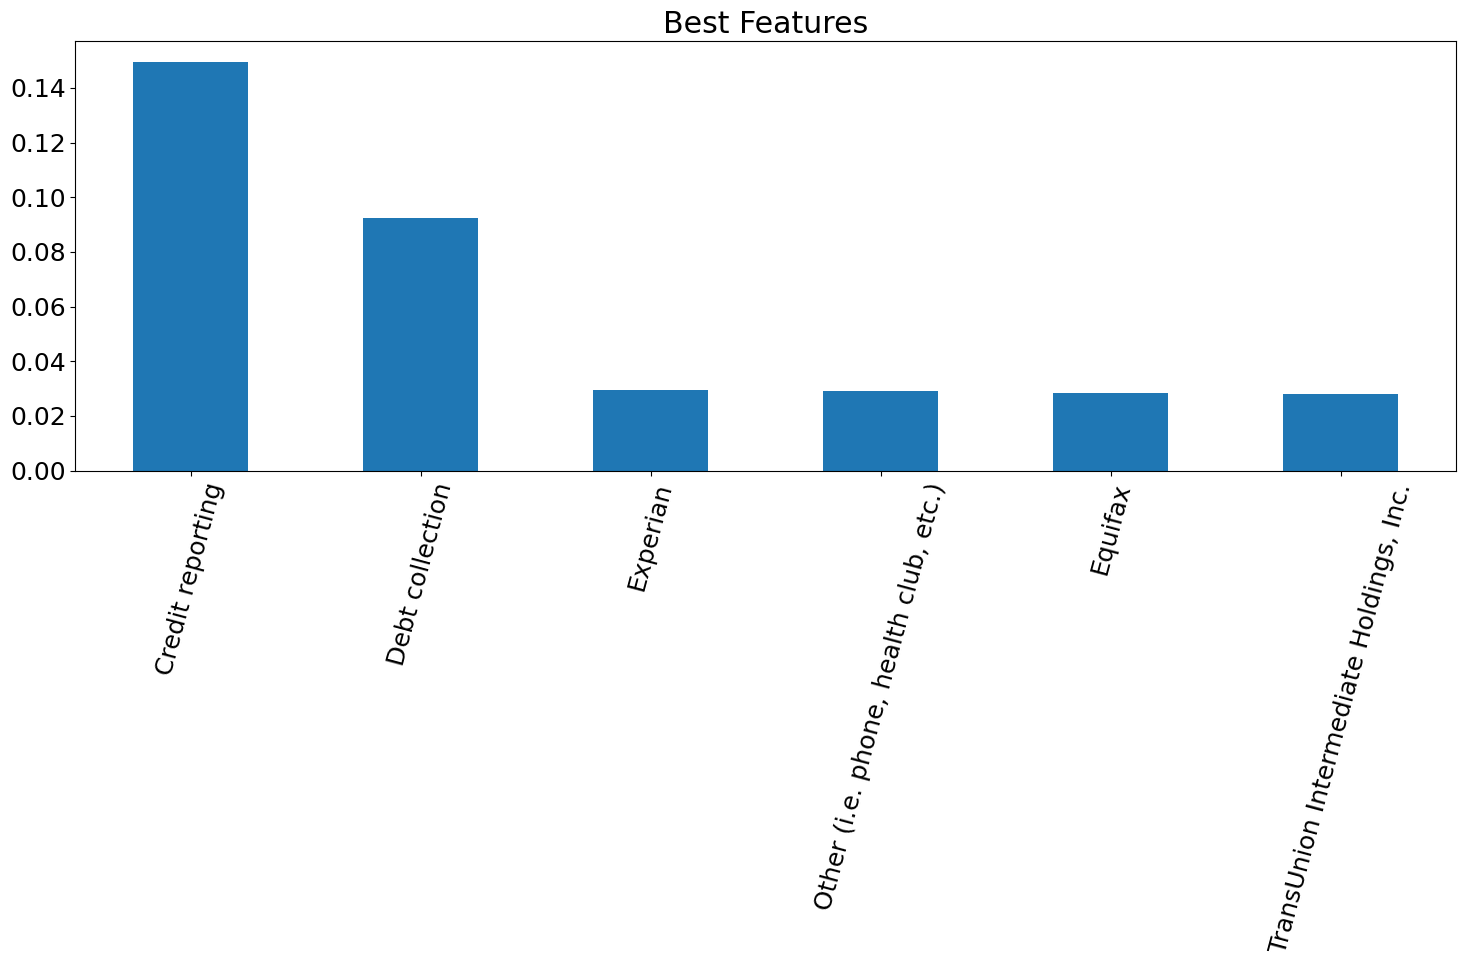

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize']=[15,10]
plt.rcParams['figure.autolayout']=True
ranked_featuers=pd.Series(model.feature_importances_,index=x.columns)
ranked_featuers.nlargest(6).plot(kind="bar")
plt.xticks(rotation=75)
plt.title('Best Features')
plt.show()


In [ ]:
x_indices = list(sk.get_support(indices=True))
ml_cols = [x.columns[index] for index in x_indices]
x = x[ml_cols]

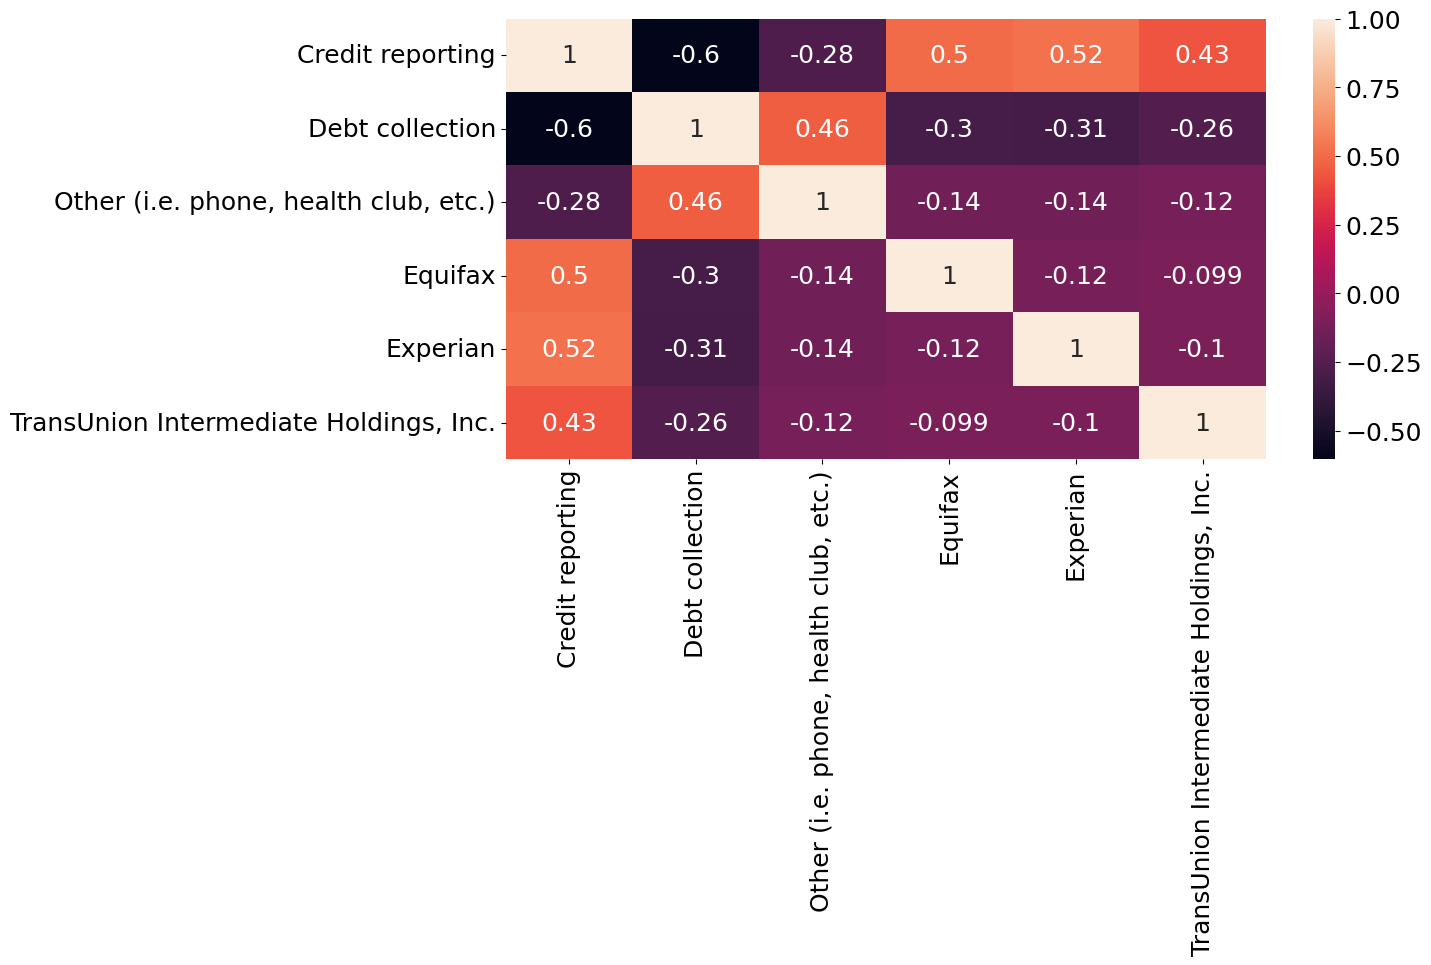

In [ ]:
sns.heatmap(x.corr(), annot=True)
plt.show()

In [ ]:
NB = MultinomialNB(force_alpha=True)
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ADA = AdaBoostClassifier(n_estimators=500, random_state=25)
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.5)
NB.fit(x_train, y_train, sample_weight=1)
LR.fit(x_train, y_train)
DT.fit(x_train, y_train)
RF.fit(x_train, y_train)
ADA.fit(x_train, y_train)
GB.fit(x_train, y_train)
algo_list = [
    'Naive Bayes',
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Ada Boost',
    'Gradient Boosting'
]

In [ ]:
train_scores = []
NB_train_score = NB.score(x_train, y_train)
train_scores.append(NB_train_score)
LR_train_score = LR.score(x_train, y_train)
train_scores.append(LR_train_score)
DT_train_score = DT.score(x_train, y_train)
train_scores.append(DT_train_score)
RF_train_score = RF.score(x_train, y_train)
train_scores.append(RF_train_score)
ADA_train_score = ADA.score(x_train, y_train)
train_scores.append(ADA_train_score)
GB_train_score = GB.score(x_train, y_train)
train_scores.append(GB_train_score)

test_scores = []
NB_test_score = DT.score(x_test, y_test)
test_scores.append(NB_test_score)
LR_test_score = LR.score(x_test, y_test)
test_scores.append(LR_test_score)
DT_test_score = DT.score(x_test, y_test)
test_scores.append(DT_test_score)
RF_test_score = RF.score(x_test, y_test)
test_scores.append(RF_test_score)
ADA_test_score = ADA.score(x_test, y_test)
test_scores.append(ADA_test_score)
GBC_test_score = GB.score(x_test, y_test)
test_scores.append(GBC_test_score)

train_preds = []
NB_train_pred = NB.predict(x_train)
train_preds.append(NB_train_pred)
LR_train_pred = LR.predict(x_train)
train_preds.append(LR_train_pred)
DT_train_pred = DT.predict(x_train)
train_preds.append(DT_train_pred)
RF_train_pred = RF.predict(x_train)
train_preds.append(RF_train_pred)
ADA_train_pred = ADA.predict(x_train)
train_preds.append(ADA_train_pred)
GBC_train_pred = GB.predict(x_train)
train_preds.append(GBC_train_pred)

test_preds = []
NB_test_pred = NB.predict(x_test)
test_preds.append(NB_test_pred)
LR_test_pred = LR.predict(x_test)
test_preds.append(LR_test_pred)
DT_test_pred = DT.predict(x_test)
test_preds.append(DT_test_pred)
RF_test_pred = RF.predict(x_test)
test_preds.append(RF_test_pred)
ADA_test_pred = ADA.predict(x_test)
test_preds.append(ADA_test_pred)
GBC_test_pred = GB.predict(x_test)
test_preds.append(GBC_test_pred)

In [ ]:
# Train Scores
for i, algo in enumerate(algo_list):
    print(f'Train score for {algo} algorithm: {train_scores[i]: .4f}.')

Train score for Naive Bayes algorithm:  0.8475.
Train score for Logistic Regression algorithm:  0.8478.
Train score for Decision Tree algorithm:  0.8478.
Train score for Random Forest algorithm:  0.8478.
Train score for Ada Boost algorithm:  0.8478.
Train score for Gradient Boosting algorithm:  0.8478.


In [ ]:
# Test Scores
for i, algo in enumerate(algo_list):
    print(f'Test score for {algo} algorithm: {test_scores[i]: .4f}.')

Test score for Naive Bayes algorithm:  0.8444.
Test score for Logistic Regression algorithm:  0.8444.
Test score for Decision Tree algorithm:  0.8444.
Test score for Random Forest algorithm:  0.8444.
Test score for Ada Boost algorithm:  0.8444.
Test score for Gradient Boosting algorithm:  0.8444.


In [ ]:
# F1 Scores
f1_scores=[]
for i, algo in enumerate(algo_list):
    f1_scores.append(f1_score(y_test, train_preds[i]))
    print(f'F1 Score for {algo} algorithm: {f1_score(y_test, train_preds[i]): .4f}.')

F1 Score for Naive Bayes algorithm:  0.3474.
F1 Score for Logistic Regression algorithm:  0.3476.
F1 Score for Decision Tree algorithm:  0.3476.
F1 Score for Random Forest algorithm:  0.3476.
F1 Score for Ada Boost algorithm:  0.3476.
F1 Score for Gradient Boosting algorithm:  0.3476.


In [ ]:
# Accuracy Scores
acc_scores=[]
for i, algo in enumerate(algo_list):
    acc_scores.append(accuracy_score(y_test, train_preds[i]))
    print(f'Accuracy Score Score for {algo} algorithm: {accuracy_score(y_test, train_preds[i]): .4f}.')

Accuracy Score Score for Naive Bayes algorithm:  0.5231.
Accuracy Score Score for Logistic Regression algorithm:  0.5234.
Accuracy Score Score for Decision Tree algorithm:  0.5234.
Accuracy Score Score for Random Forest algorithm:  0.5234.
Accuracy Score Score for Ada Boost algorithm:  0.5234.
Accuracy Score Score for Gradient Boosting algorithm:  0.5234.


In [ ]:
for algo in algo_list:
    print(f'{algo}')
    print(classification_report(NB_test_pred,y_test))
    print()

Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2181
           1       0.69      0.92      0.79      1025

    accuracy                           0.84      3206
   macro avg       0.82      0.86      0.83      3206
weighted avg       0.87      0.84      0.85      3206


Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2181
           1       0.69      0.92      0.79      1025

    accuracy                           0.84      3206
   macro avg       0.82      0.86      0.83      3206
weighted avg       0.87      0.84      0.85      3206


Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2181
           1       0.69      0.92      0.79      1025

    accuracy                           0.84      3206
   macro avg       0.82      0.86      0.83      3206
weighted avg       0.87   

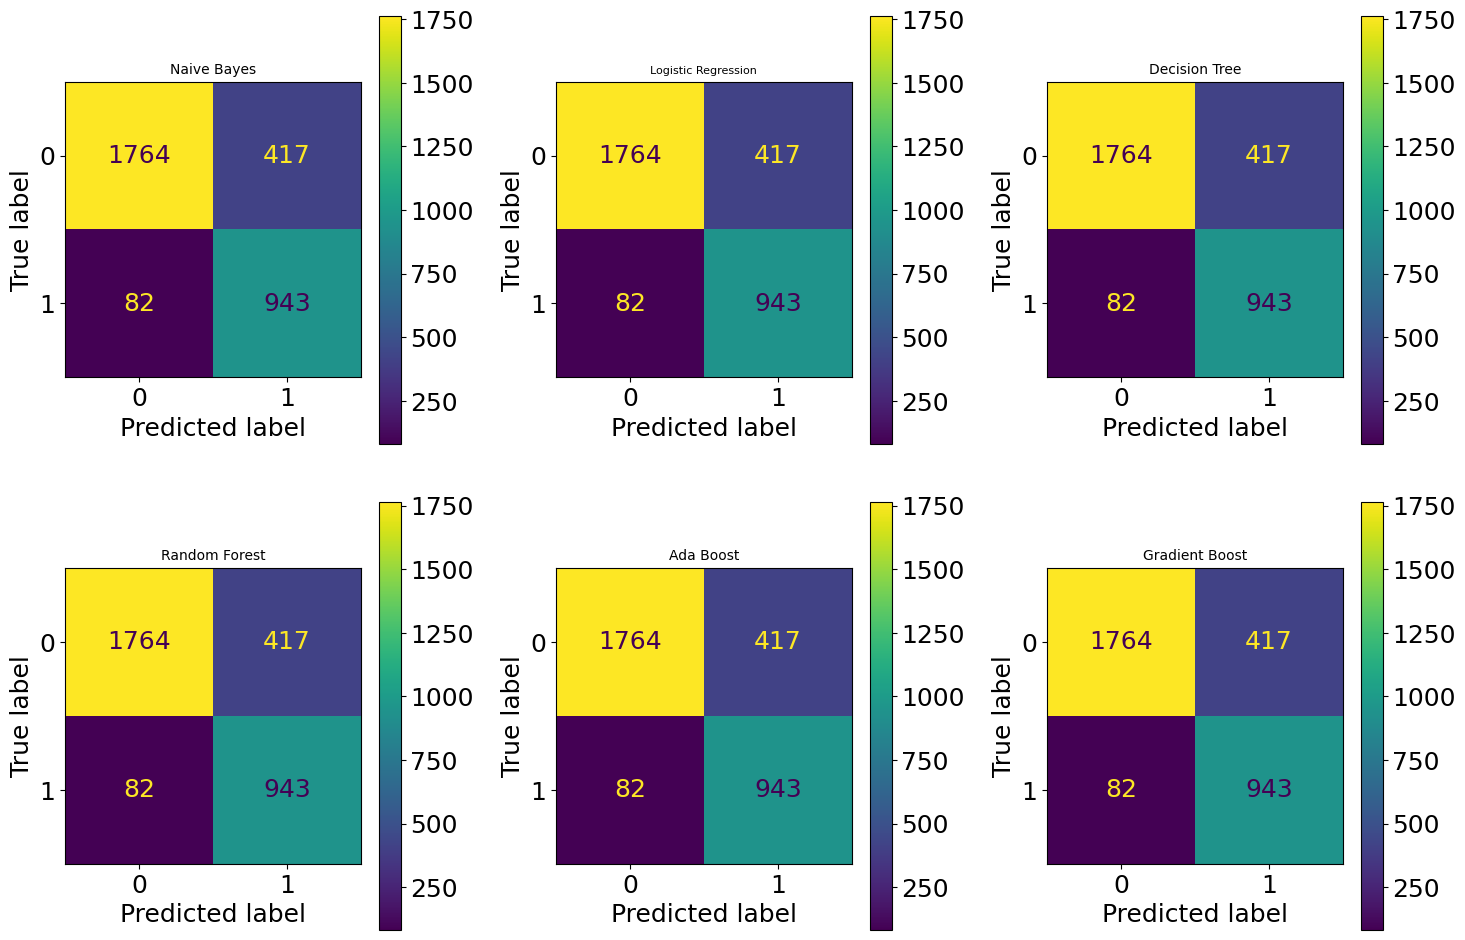

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3)
nb_cm=confusion_matrix(NB_test_pred,y_test)
nb_disp=ConfusionMatrixDisplay(nb_cm,display_labels=NB.classes_)
nb_disp.plot(ax=axs[0,0])
axs[0,0].set_title('Naive Bayes', fontsize=10)

lr_cm=confusion_matrix(LR_test_pred,y_test)
lr_disp=ConfusionMatrixDisplay(lr_cm,display_labels=NB.classes_)
lr_disp.plot(ax=axs[0,1])
axs[0,1].set_title('Logistic Regression', fontsize=8)

dt_cm=confusion_matrix(DT_test_pred,y_test)
dt_disp=ConfusionMatrixDisplay(dt_cm,display_labels=NB.classes_)
dt_disp.plot(ax=axs[0,2])
axs[0,2].set_title('Decision Tree', fontsize=10)

rf_cm=confusion_matrix(RF_test_pred,y_test)
rf_disp=ConfusionMatrixDisplay(rf_cm,display_labels=NB.classes_)
rf_disp.plot(ax=axs[1,0])
axs[1,0].set_title('Random Forest', fontsize=10)

ada_cm=confusion_matrix(ADA_test_pred,y_test)
ada_disp=ConfusionMatrixDisplay(ada_cm,display_labels=NB.classes_)
ada_disp.plot(ax=axs[1,1])
axs[1,1].set_title('Ada Boost', fontsize=10)

gbc_cm=confusion_matrix(GBC_test_pred,y_test)
gbc_disp=ConfusionMatrixDisplay(gbc_cm,display_labels=NB.classes_)
gbc_disp.plot(ax=axs[1,2])
axs[1,2].set_title('Gradient Boost', fontsize=10)

plt.show()


In [ ]:
for i, algo in enumerate(algo_list):
    print(f'{algo}:')
    tn, fp, fn, tp = confusion_matrix(y_test,test_preds[i]).ravel()
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Positives: {tp}\n')


Naive Bayes:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

Logistic Regression:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

Decision Tree:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

Random Forest:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

Ada Boost:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

Gradient Boosting:
True Negatives: 1764
False Positives: 82
False Negatives: 417
True Positives: 943

